**Aram Adamyan**

Topic: prediction of startup success or fail

In [648]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [649]:
df1 = pd.read_csv("dictionary.csv")

In [650]:
df1

Variable  \
0                                         Company_Name   
1                             Dependent-Company Status   
2                                     year of founding   
3                              Age of company in years   
4                              Internet Activity Score   
5                 Short Description of company profile   
6                                  Industry of company   
7                           Focus functions of company   
8                                            Investors   
9                                       Employee Count   
10                          Employees count MoM change   
11                             Has the team size grown   
12                                  Est. Founding Date   
13                                   Last Funding Date   
14                                 Last Funding Amount   
15                                  Country of company   
16                                Continent of company   
17                         Number of Investors in Seed   
18              Number of Investors in Angel and or VC   
19                               Number of Co-founders   
20                               Number of of advisors   
21                         Team size Senior leadership   
22                             Team size all employees   
23   Presence of a top angel or venture fund in pre...   
24                       Number of of repeat investors   
25                   Number of  Sales Support material   
26                             Worked in top companies   
27    Average size of companies worked for in the past   
28             Have been part of startups in the past?   
29   Have been part of successful startups in the p...   
30          Was he or she partner in Big 5 consulting?   
31                              Consulting experience?   
32                         Product or service company?   
33        Catering to product/service across verticals   
34                    Focus on private or public data?   
35                             Focus on consumer data?   
36            Focus on structured or unstructured data   
37                         Subscription based business   
38             Cloud or platform based serive/product?   
39                              Local or global player   
40                 Linear or Non-linear business model   
41   Capital intensive business e.g. e-commerce, En...   
42                   Number of  of Partners of company   
43                        Crowdsourcing based business   
44                         Crowdfunding based business   
45                     Machine Learning based business   
46                       Predictive Analytics business   
47                           Speech analytics business   
48                     Prescriptive analytics business   
49                                   Big Data Business   
50         Cross-Channel Analytics/ marketing channels   
51   Owns data or not? (monetization of data) e.g. ...   
52   Is the company an aggregator/market place? e.g...   
53   Online or offline venture - physical location ...   
54                                 B2C or B2B venture?   
55   Top forums like 'Tech crunch' or 'Venture beat...   
56   Average Years of experience for founder and co...   
57                           Exposure across the globe   
58              Breadth of experience across verticals   
59                                   Highest education   
60                                  Years of education   
61                 Specialization of highest education   
62                   Relevance of education to venture   
63                  Relevance of experience to venture   
64          Degree from a Tier 1 or Tier 2 university?   
65                     Renowned in professional circle   
66         Experience in selling and building products   
67             Experience in Fortune 100 organizations   
68             Experience in Fortune 500 org

In [651]:
df=pd.read_csv("data.csv",encoding='latin1')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Understanding Data

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(4), int64(6), object(106)
memory usage: 427.9+ KB


In [653]:
df

Company_Name Dependent-Company Status  year of founding  \
0     Company421                   Failed              1997   
1     Company137                   Failed              2000   
2     Company418                   Failed              2003   
3     Company136                   Failed              2004   
4     Company138                   Failed              2004   
5     Company139                   Failed              2005   
6     Company141                   Failed              2005   
7     Company228                   Failed              2005   
8     Company237                   Failed              2005   
9     Company284                   Failed              2005   
10    Company374                   Failed              2005   
11    Company404                   Failed              2005   
12    Company419                   Failed              2005   
13    Company432                   Failed              2005   
14    Company437                   Failed              2005   
15    Company451                   Failed              2005   
16    Company148                   Failed              2006   
17    Company150                   Failed              2006   
18    Company276                   Failed              2006   
19    Company296                   Failed              2006   
20    Company338                   Failed              2006   
21    Company387                   Failed              2006   
22    Company396                   Failed              2006   
23    Company422                   Failed              2006   
24    Company454                   Failed              2006   
25    Company467                   Failed              2006   
26    Company147                   Failed              2007   
27    Company151                   Failed              2007   
28    Company159                   Failed              2007   
29    Company160                   Failed              2007   
30    Company170                   Failed              2007   
31    Company241                   Failed              2007   
32    Company263                   Failed              2007   
33    Company264                   Failed              2007   
34    Company267                   Failed              2007   
35    Company273                   Failed              2007   
36    Company279                   Failed              2007   
37    Company282                   Failed              2007   
38    Company294                   Failed              2007   
39    Company378                   Failed              2007   
40    Company400                   Failed              2007   
41    Company417                   Failed              2007   
42    Company420                   Failed              2007   
43    Company428                   Failed              2007   
44    Company463                   Failed              2007   
45    Company466                   Failed              2007   
46    Company142                   Failed              2008   
47    Company146                   Failed              2008   
48    Company227                   Failed              2008   
49    Company285                   Failed              2008   
50    Company288                   Failed              2008   
51    Company289                   Failed              2008   
52    Company295                   Failed              2008   
53    Company297                   Failed              2008   
54    Company323                   Failed              2008   
55    Company375                   Failed              2008   
56    Company392                   Failed              2008   
57    Company398                   Failed              2008   
58    Company411                   Failed              2008   
59    Company416                   Failed              2008   
60    Company426                   Failed              2008   
61    Company442                   Failed              2008   
62    Company140                   

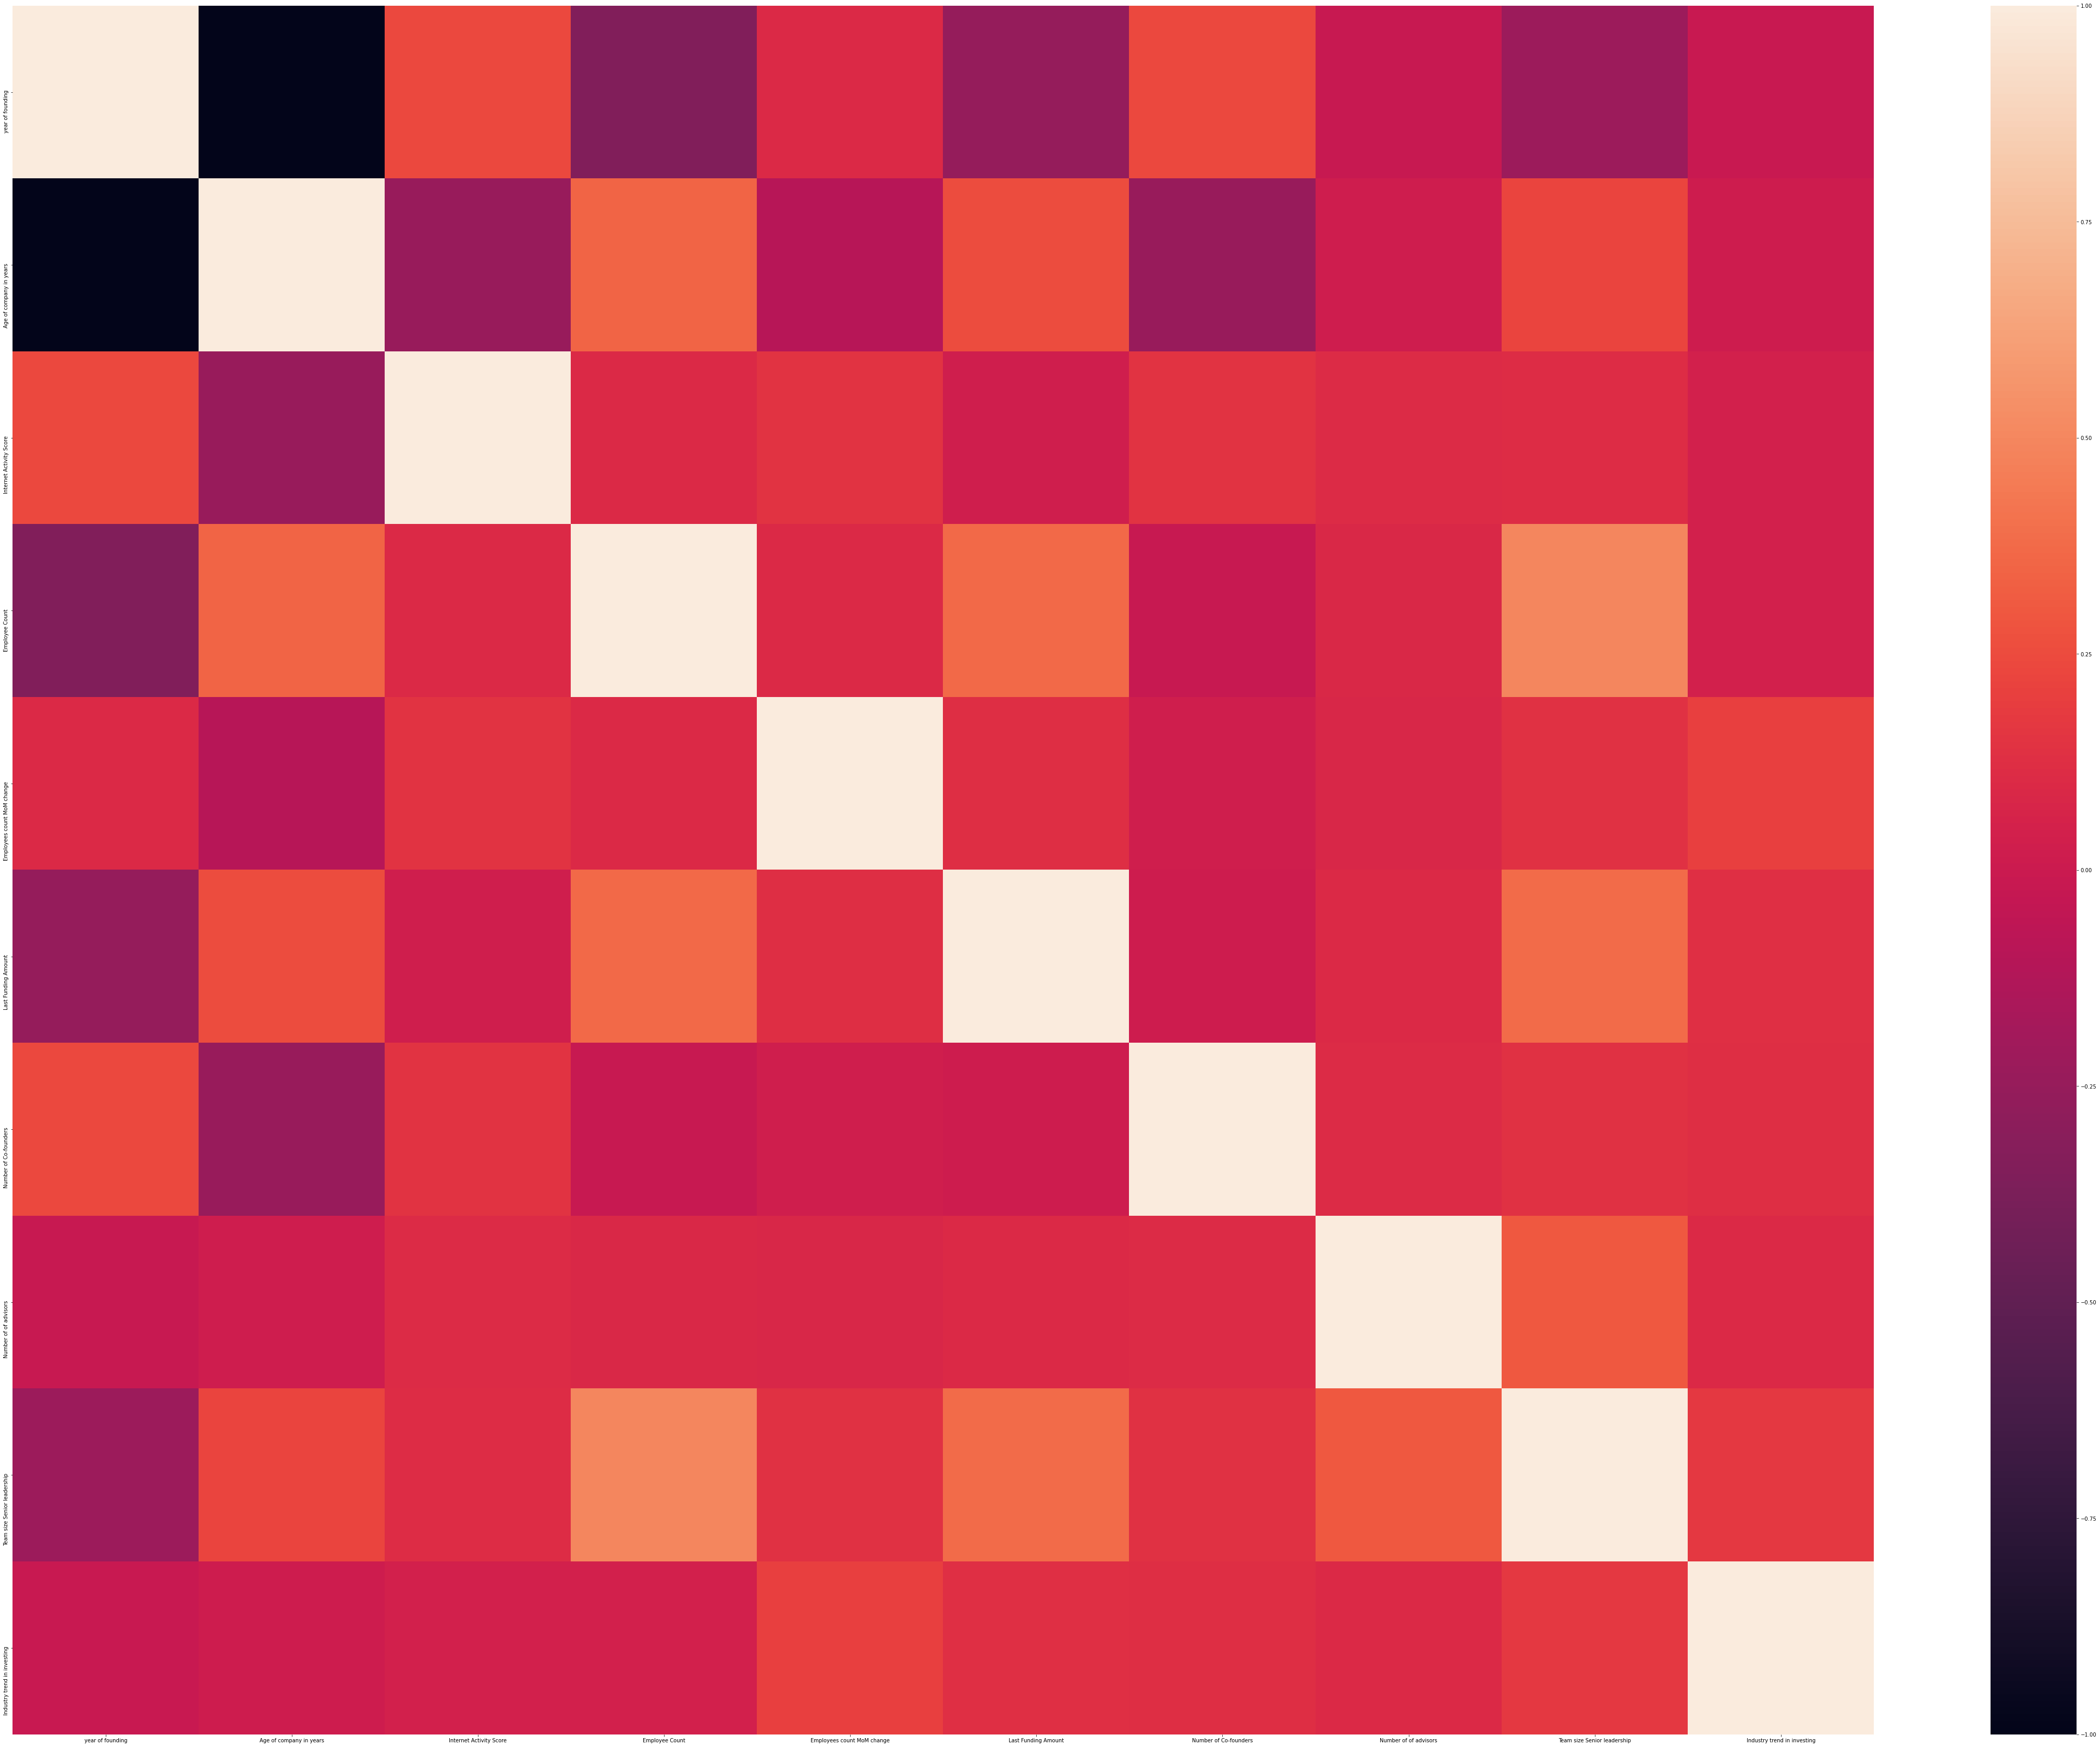

In [654]:
plt.figure(figsize=(80,61))
sns.heatmap(df.corr())
plt.show()

In [655]:
df.columns.tolist()

['Company_Name',
 'Dependent-Company Status',
 'year of founding',
 'Age of company in years',
 'Internet Activity Score',
 'Short Description of company profile',
 'Industry of company',
 'Focus functions of company',
 'Investors',
 'Employee Count',
 'Employees count MoM change',
 'Has the team size grown',
 'Est. Founding Date',
 'Last Funding Date',
 'Last Funding Amount',
 'Country of company',
 'Continent of company',
 'Number of Investors in Seed',
 'Number of Investors in Angel and or VC',
 'Number of Co-founders',
 'Number of of advisors',
 'Team size Senior leadership',
 'Team size all employees',
 'Presence of a top angel or venture fund in previous round of investment',
 'Number of of repeat investors',
 'Number of  sales Support material',
 'Worked in top companies',
 'Average size of companies worked for in the past',
 'Have been part of startups in the past?',
 'Have been part of successful startups in the past?',
 'Was he or she partner in Big 5 consulting?',
 'Consulti

# Data preproccessing

###### here we clear our data, try to fill the None values, do some feature selection and eventually do dummification.

In [656]:
j=df.groupby("Continent of company")["Dependent-Company Status"].count().index.to_list()
l=[int(((df["Continent of company"].isnull().sum()*i)/sum(df.groupby("Continent of company")["Dependent-Company Status"].count())).round(0)) for i in df.groupby("Continent of company")["Dependent-Company Status"].count()]
for i in range(len(j)):
    df["Continent of company"].fillna(j[i], limit=l[i], inplace=True)
df["difference between last funding and founding of the company"]=abs(df["Last Funding Date"].str[-4:].astype("int64", copy=False)-df["year of founding"].astype("int64", copy=False))
df.drop(["Short Description of company profile",'Focus on private or public data?','Company_Name','Survival through recession, based on existence of the company through recession times',"Industry of company","Investors","Employees count MoM change","Client Reputation","Employee benefits and salary structures","Number of  of Partners of company"],axis=1,inplace=True)
df.drop(["Employee Count","Years of education",'Last round of funding received (in milionUSD)','Top management similarity','Time to maturity of technology (in years)',"Est. Founding Date","Number of Investors in Angel and or VC","Last Funding Date","year of founding","Country of company","Number of  of Research publications","Focus on structured or unstructured data"],axis=1,inplace=True)
df = df.replace("No Info", np.nan)
df = df.replace("No", 0)
df = df.replace("no", 0)
df = df.replace("Yes", 1)
df = df.replace("yes", 1)
df = df.replace("YES", 1)
df = df.replace("Failed", 0)
df = df.replace("Success", 1)
#replacing the NaN values with mean or median
k=df.groupby("Dependent-Company Status")["Last Funding Amount"].median()
df["Number of Investors in Seed"]=df["Number of Investors in Seed"].astype("float64")
r=df.groupby("Dependent-Company Status")["Number of Investors in Seed"].mean().round(0)
df["Has the team size grown"]=df["Has the team size grown"].astype("float64")
q=df.groupby("Dependent-Company Status")["Has the team size grown"].mean().round(0)
for i in df["Dependent-Company Status"]:
    if i==0:
        df["Last Funding Amount"].fillna(k[0],inplace=True)
        df["Number of Investors in Seed"].fillna(r[0],inplace=True)
        df["Has the team size grown"].fillna(q[0],inplace=True)
    else:
        df["Last Funding Amount"].fillna(k[1],inplace=True)
        df["Number of Investors in Seed"].fillna(r[1],inplace=True)
        df["Has the team size grown"].fillna(q[1],inplace=True)



In [657]:
df1 = pd.get_dummies(df["Continent of company"])
df2 = pd.get_dummies(df["Focus functions of company"])
df3 = pd.get_dummies(df["B2C or B2B venture?"])
df4 = pd.get_dummies(df["Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"])
df5 = pd.get_dummies(df["Breadth of experience across verticals"])
df6 = pd.get_dummies(df["Highest education"])
df7 = pd.get_dummies(df["Breadth of experience across verticals"])
df8 = pd.get_dummies(df["Experience in selling and building products"])
df9 = pd.get_dummies(df["Gartner hype cycle stage"])
df9 = pd.get_dummies(df["Disruptiveness of technology"])
df10 = pd.get_dummies(df["Time to market service or product"])
df11 = pd.get_dummies(df["Team Composition score"])
df12 = pd.get_dummies(df["Dificulty of Obtaining Work force"])
df13 = pd.get_dummies(df["Degree from a Tier 1 or Tier 2 university?"])
df14 = pd.get_dummies(df["Specialization of highest education"])
df15 = pd.get_dummies(df["Online or offline venture - physical location based business or online venture?"])
df16 = pd.get_dummies(df["Local or global player"])
df17 = pd.get_dummies(df["Linear or Non-linear business model"])
df18 = pd.get_dummies(df["Cloud or platform based serive/product?"])
df19 = pd.get_dummies(df["Product or service company?"])
df20 = pd.get_dummies(df["Number of  sales Support material"])
df20 = pd.get_dummies(df["Average Years of experience for founder and co founder"])
df21 = pd.get_dummies(df["Average size of companies worked for in the past"])
df=pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df18,df19,df20,df21],axis=1)
df.drop(["Continent of company","Focus functions of company","B2C or B2B venture?","Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?","Highest education","Breadth of experience across verticals","Experience in selling and building products","Gartner hype cycle stage","Disruptiveness of technology","Time to market service or product","Team Composition score","Dificulty of Obtaining Work force","Degree from a Tier 1 or Tier 2 university?","Specialization of highest education","Online or offline venture - physical location based business or online venture?","Local or global player","Linear or Non-linear business model","Cloud or platform based serive/product?","Product or service company?","Number of  sales Support material","Average size of companies worked for in the past","Average Years of experience for founder and co founder"],axis=1,inplace=True)

In [658]:
for i in df.dtypes[df.dtypes==object].index.to_list():
    df[f'{i}']=df[f'{i}'].astype("float64")

In [659]:
df.dtypes[df.dtypes==object]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 450 entries, Dependent-Company Status to Small
dtypes: float64(65), int64(8), uint8(377)
memory usage: 443.1 KB


In [660]:
df=df.drop(["None"],axis=1)
df = df.loc[:,~df.columns.duplicated()]

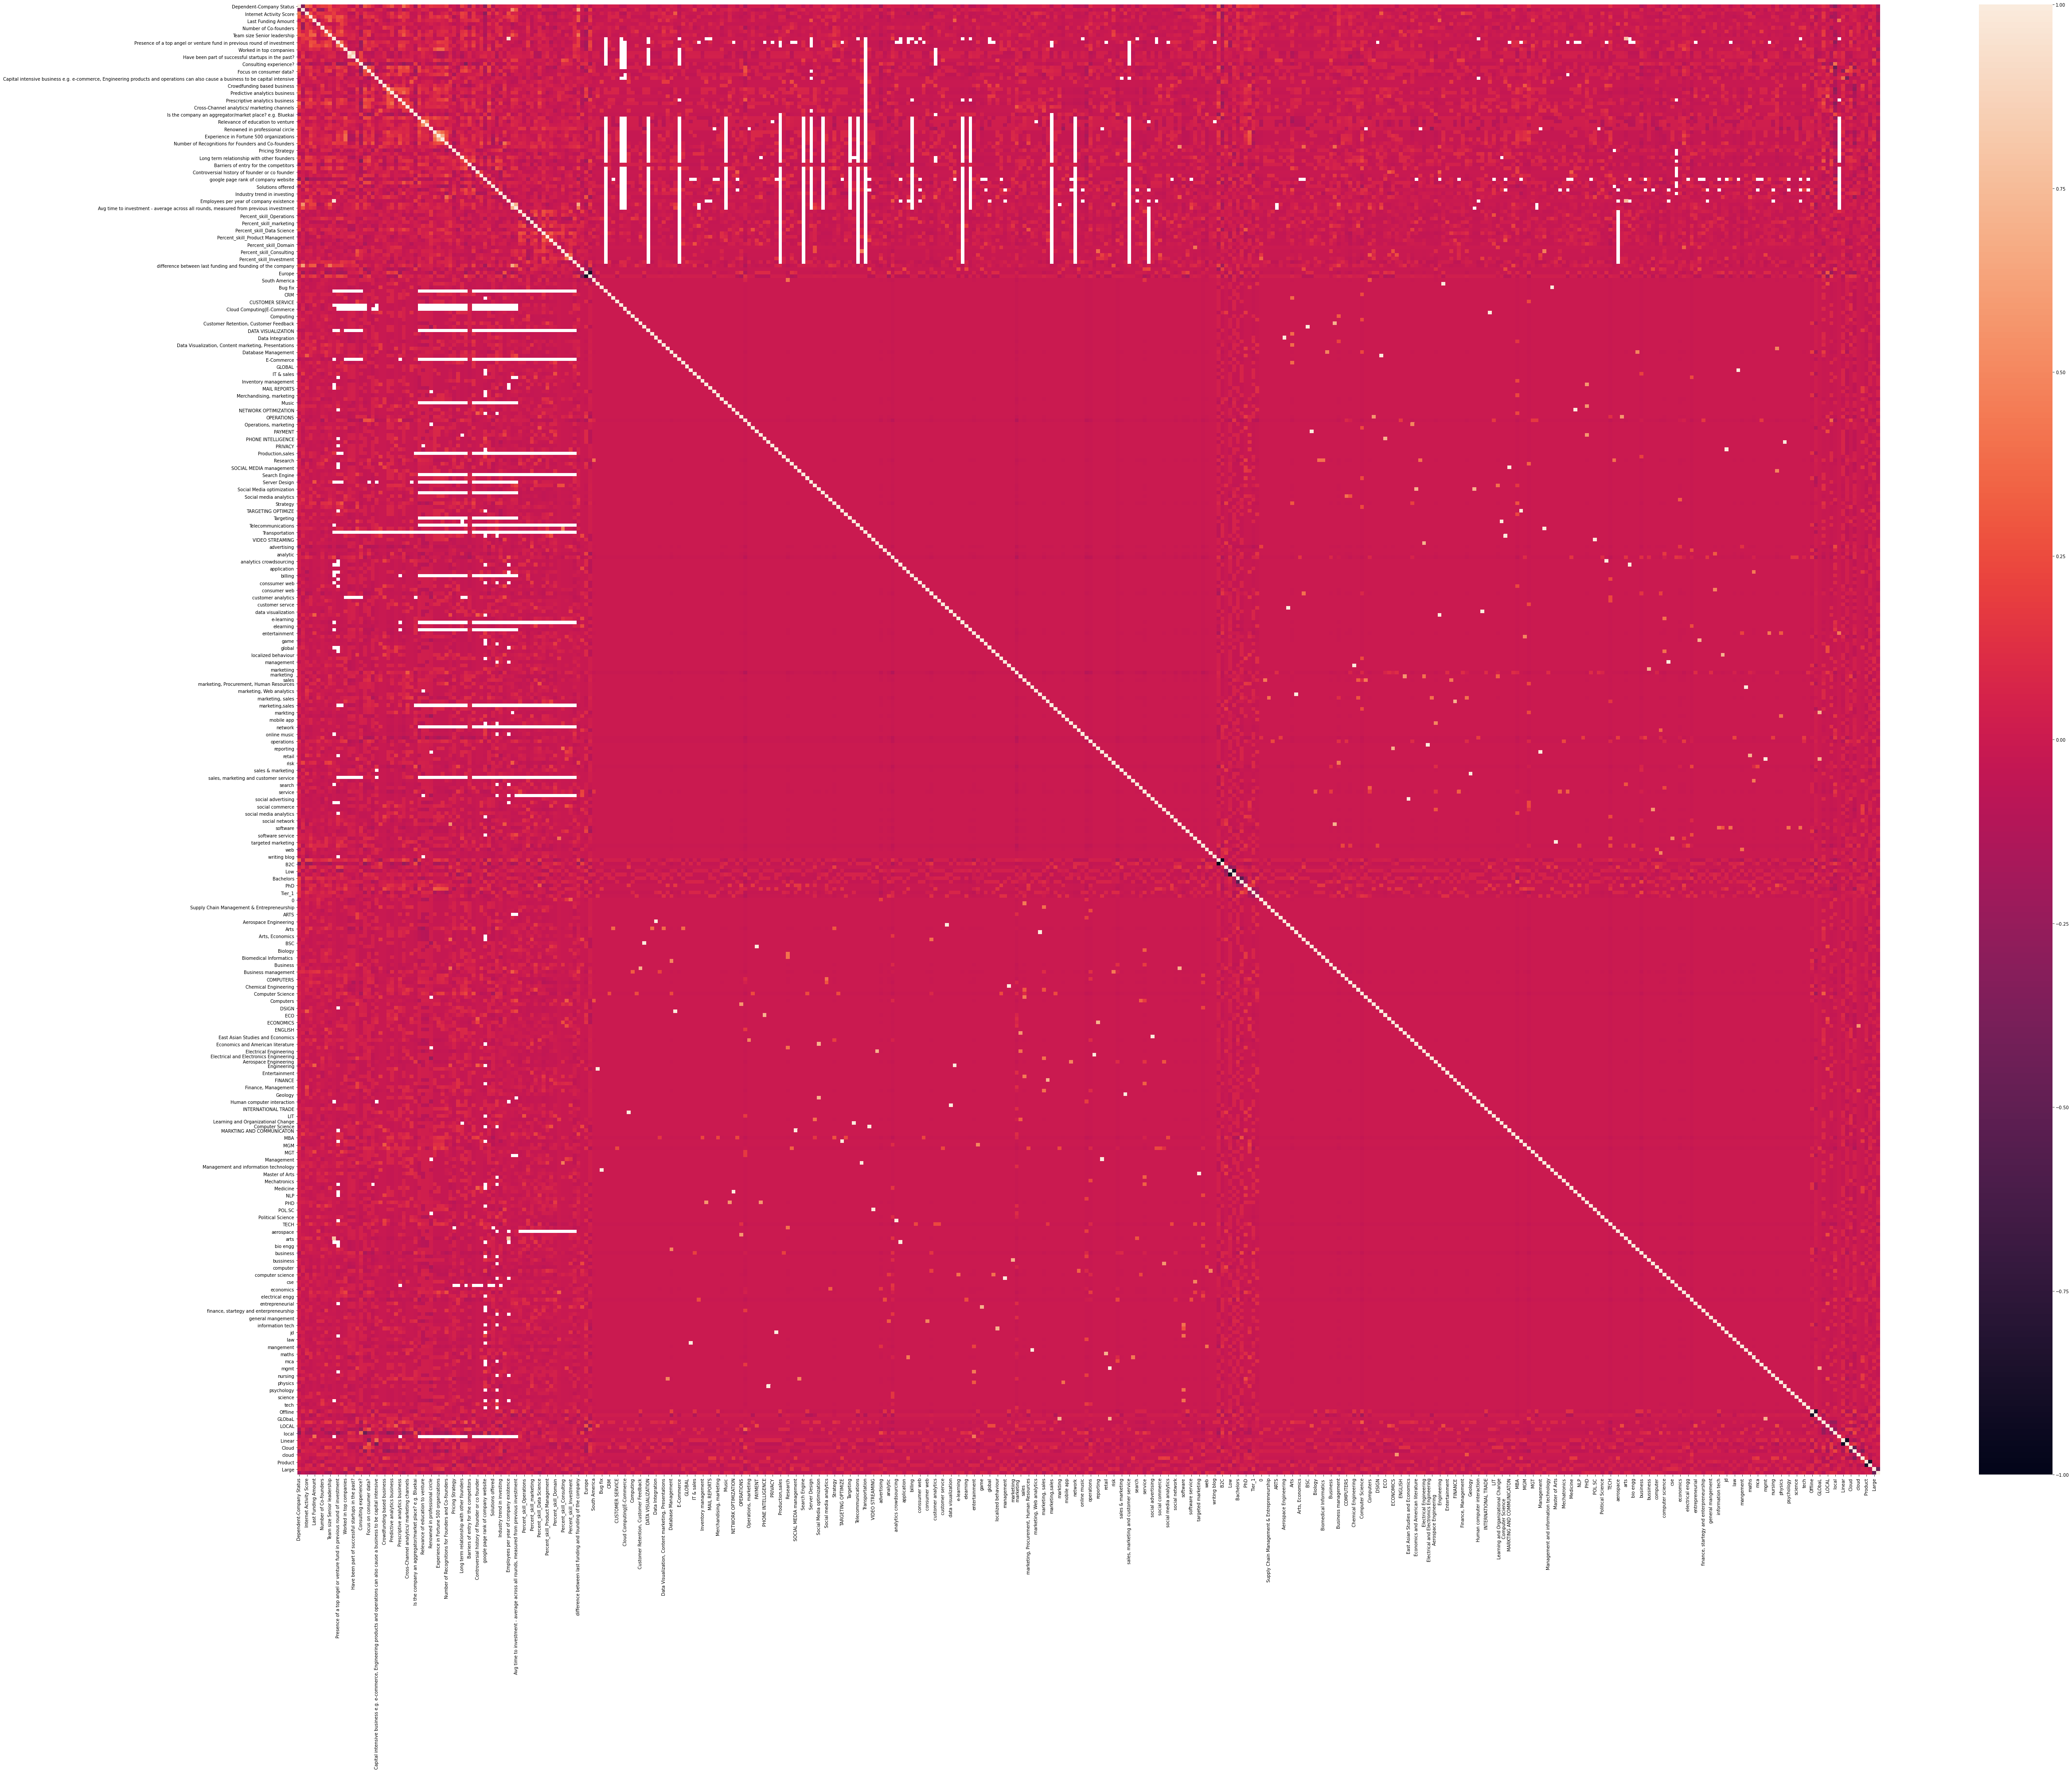

In [661]:
plt.figure(figsize=(80,61))
sns.heatmap(df.corr())
plt.show()

# XGBoost (93% accuracy)

In [662]:
y=df['Dependent-Company Status']
X=df.drop(['Dependent-Company Status'], axis=1)

In [663]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

In [664]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [665]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [666]:
param = {
    "max_depth":4,
    "eta":0.20,
    "objective":"multi:softmax",
    "num_class":2}
epochs=10

In [667]:
model= xgb.train(param,train,epochs)
predictions= model.predict(test)
print(predictions)

[22:35:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.]


In [668]:
accuracy_score(y_test,predictions)

0.9263157894736842

# RandomForest (Accuracy: 86.69%)

In [669]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [670]:
df=pd.read_csv("data.csv",encoding='latin1')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf=newdf.dropna()
y=df.loc[newdf.index.to_list(),["Dependent-Company Status"]]

In [671]:
X_train, X_test, y_train, y_test = train_test_split(newdf,y,test_size=0.2,random_state=47)

In [672]:
def get_results_binary(clf,clf_name,x_train,y_train,x_test,y_test):
    y_pred = clf.predict(x_test)
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}\n'.format(accuracy_score(y_test, clf.predict(x_test))))
    print('Classification Report('+clf_name+'): \n' + classification_report(y_test, y_pred))
        
    print('10 fold Cross Validation('+clf_name+'):')
    cv_accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)
   

In [673]:
rfb = RandomForestClassifier(random_state = 42,                             
                                 min_samples_leaf = 2,
                                 max_depth=5,
                                 n_estimators=200
                            )
rfb.fit(X_train, y_train)

<ipython-input-673-ac25be03fe83>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfb.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

Training Accuracy(Random Forest with 2 class Classification): 92.17%
Test Accuracy(Random Forest with 2 class Classification): 71.43%

Classification Report(Random Forest with 2 class Classification): 
              precision    recall  f1-score   support

      Failed       0.00      0.00      0.00        12
     Success       0.71      1.00      0.83        30

    accuracy                           0.71        42
   macro avg       0.36      0.50      0.42        42
weighted avg       0.51      0.71      0.60        42

10 fold Cross Validation(Random Forest with 2 class Classification):


C:\Users\37494\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\37494\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\37494\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\37494\anaconda3\lib\site-packages\sklearn\mode

Accuracy: 87.32%


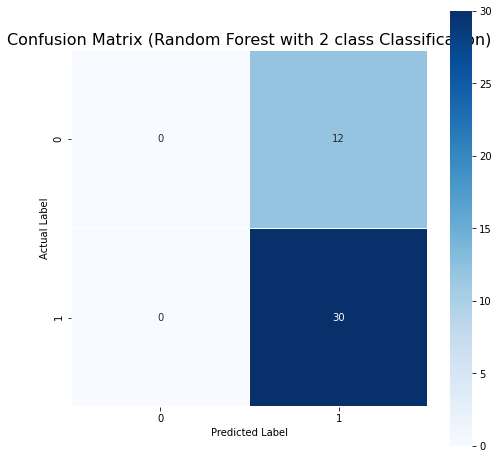

In [674]:
get_results_binary(rfb,'Random Forest with 2 class Classification',X_train,y_train,X_test,y_test)

# Conclsion


As I didnt have much time with that so I was not able to try other medels such as Logistic regression or Knn so I decided to go with xgboost which is very effiecient in our data as we have alot of Empty values. As you can see my model performs really well although I havnt done crossvalidation to get exact value but It will be around that score.